<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/02.KNN_Amazon_Food_Reviews/KNN_Amazon_Food_Reviews_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# KNN Tasks

<ol>
    <li><strong>Apply Knn(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Apply Knn(kd tree version) on these feature sets</strong>
        <br><font color='red'>NOTE: </font>sklearn implementation of kd-tree accepts only dense matrices, you need to convert the sparse matrices of CountVectorizer/TfidfVectorizer into dense matices. You can convert sparse matrices to dense using .toarray() attribute. For more information please visit this <a href='https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.toarray.html'>link</a>
        <ul>
            <li><font color='red'>SET 5:</font>Review text, preprocessed one converted into vectors using (BOW) but with restriction on maximum features generated.
            <pre>
            count_vect = CountVectorizer(min_df=10, max_features=500) 
            count_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 6:</font>Review text, preprocessed one converted into vectors using (TFIDF) but with restriction on maximum features generated.
            <pre>
                tf_idf_vect = TfidfVectorizer(min_df=10, max_features=500)
                tf_idf_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best K)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.</li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    </li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
       

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#load the preprocessed data we use only 100000 points for issue of Memory Error
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv',nrows=100000)

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [ ]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [ ]:
print(X.shape)
print(Y.shape)

(100000,)
(100000,)


# Applying KNN brute force
##### Applying KNN brute force on BOW Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

X_train,X_cv,Y_train,Y_cv=train_test_split(X_train,Y_train,test_size=0.3) #random splitting
   
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_cv.shape,Y_cv.shape)

(49000,) (49000,)
(30000,) (30000,)
(21000,) (21000,)


In [ ]:
#featurization_using_Bow
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(X_train)
X_train_bow=vect.fit_transform(X_train)
X_test_bow=vect.transform(X_test)
X_cv_bow=vect.transform(X_cv)

#after vectorizations
print(X_train_bow.shape,Y_train.shape)
print(X_test_bow.shape,Y_test.shape)
print(X_cv_bow.shape,Y_cv.shape)

(49000, 29453) (49000,)
(30000, 29453) (30000,)
(21000, 29453) (21000,)


In [ ]:
X_train=X_train_bow
X_test=X_test_bow
X_cv=X_cv_bow

In [ ]:
#hyperparameter tuning for find optimal_K
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def Grid_search(X_train,Y_train,algorithm):
    cv=KFold(n_splits=5)
    myList = list(range(0,50))
    K=list(filter(lambda x: x % 2 != 0, myList))
    neigh=KNeighborsClassifier(algorithm=algorithm)
    parameters = {'n_neighbors':list(filter(lambda x: x % 2 != 0, myList))}
    clf = GridSearchCV(neigh, parameters, cv=cv, scoring='roc_auc',return_train_score=True,verbose=1)
    clf.fit(X_train, Y_train)
    
    results = pd.DataFrame.from_dict(clf.cv_results_)
    results = results.sort_values(['param_n_neighbors'])

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_k = clf.best_params_['n_neighbors']
    
    sns.set()
    plt.plot(K, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(K, cv_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    
    print("Best cross-validation score: {:.3f}".format(clf.best_score_))
    print('The best k from gridsearch :',best_k)
    return  best_k

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 161.9min finished


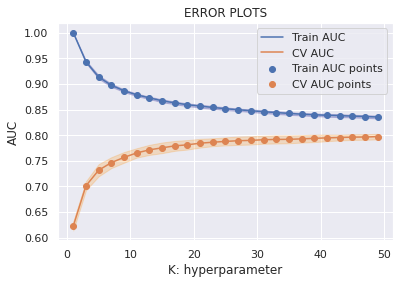

Best cross-validation score: 0.797
The best k from gridsearch : 49


In [ ]:
best_k=Grid_search(X_train,Y_train,'brute')

In [ ]:
from tqdm import tqdm
def cross_validation(x_train,y_train,X_cv,Y_cv,algorithm):
    train_auc = []
    cv_auc = []
    myList = list(range(0,50))
    K=list(filter(lambda x: x % 2 != 0, myList))
    for i in tqdm(K):
        neigh = KNeighborsClassifier(n_neighbors=i,algorithm=algorithm)
        neigh.fit(x_train, y_train)

   # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
        y_train_pred =  neigh.predict_proba(x_train)[:,1]
        y_cv_pred =  neigh.predict_proba(X_cv)[:,1]
    
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv, y_cv_pred))

    sns.set()    
    plt.plot(K, train_auc, label='Train AUC')
    plt.plot(K, cv_auc, label='CV AUC')

    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()



  0%|          | 0/25 [00:00<?, ?it/s]

  4%|▍         | 1/25 [01:57<47:05, 117.74s/it]

  8%|▊         | 2/25 [04:05<46:19, 120.86s/it]

 12%|█▏        | 3/25 [06:35<47:30, 129.55s/it]

 16%|█▌        | 4/25 [09:05<47:25, 135.49s/it]

 20%|██        | 5/25 [11:34<46:34, 139.73s/it]

 24%|██▍       | 6/25 [14:03<45:08, 142.54s/it]

 28%|██▊       | 7/25 [16:32<43:20, 144.47s/it]

 32%|███▏      | 8/25 [19:02<41:20, 145.92s/it]

 36%|███▌      | 9/25 [21:31<39:10, 146.92s/it]

 40%|████      | 10/25 [24:00<36:55, 147.68s/it]

 44%|████▍     | 11/25 [26:29<34:32, 148.03s/it]

 48%|████▊     | 12/25 [28:58<32:07, 148.25s/it]

 52%|█████▏    | 13/25 [31:26<29:39, 148.33s/it]

 56%|█████▌    | 14/25 [33:55<27:10, 148.27s/it]

 60%|██████    | 15/25 [36:22<24:40, 148.10s/it]

 64%|██████▍   | 16/25 [38:52<22:18, 148.70s/it]

 68%|██████▊   | 17/25 [41:20<19:46, 148.25s/it]

 72%|███████▏  | 18/25 [43:48<17:17, 148.23s/it]

 76%|███████▌  | 19/25 [46:15<14:47, 147.98s/it]

 80%|████████  | 

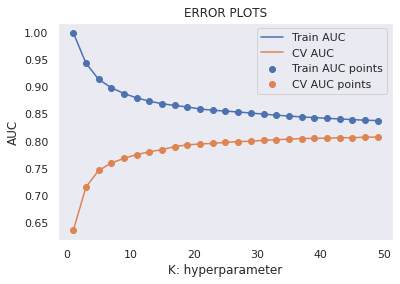

In [ ]:
cross_validation(X_train,Y_train,X_cv,Y_cv,'brute')

In [ ]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
#best_k =Grid_search(X_train,Y_train,'brute')
best_k

49

# Testing with Test data

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

def test_data(x_train,y_train,x_test,y_test,algorithm):
    neigh = KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm, n_jobs=-1)
    neigh.fit(x_train, y_train)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

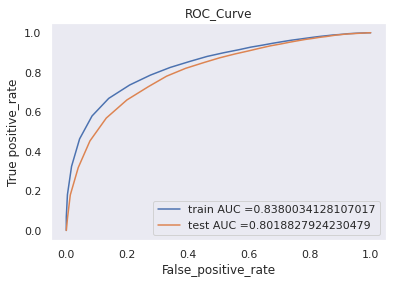

The AUC_score of test_data is : 0.8018827924230479


In [ ]:
test_data(X_train,Y_train,X_test,Y_test,'brute')

In [ ]:
#computing the metric score
#Confusion matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(x_train,y_train,x_test,y_test,algorithm):
    knn=KNeighborsClassifier(n_neighbors=best_k,algorithm=algorithm)
    knn.fit(x_train,y_train)
    predict=knn.predict(x_test)

    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
    report=classification_report(y_test,predict)
    print(report)
    
    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()
    

              precision    recall  f1-score   support

           0       0.65      0.10      0.17      4430
           1       0.86      0.99      0.92     25570

    accuracy                           0.86     30000
   macro avg       0.75      0.54      0.55     30000
weighted avg       0.83      0.86      0.81     30000



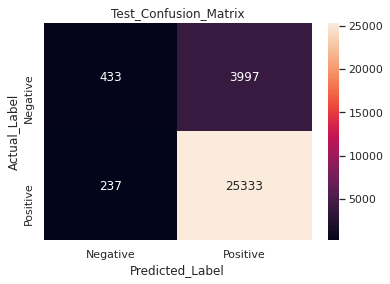

In [ ]:
metric(X_train,Y_train,X_test,Y_test,'brute')

## Applying KNN brute force on TFIDF Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)   

(70000,) (70000,)
(30000,) (30000,)


In [ ]:
#generating the tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1, 2))
X_train_tf_idf=vect.fit_transform(X_train)
X_test_tf_idf=vect.transform(X_test)

#after vectorizations
print(X_train_tf_idf.shape,Y_train.shape)
print(X_test_tf_idf.shape,Y_test.shape)

(70000, 35203) (70000,)
(30000, 35203) (30000,)


In [ ]:
X_train=X_train_tf_idf
X_test=X_test_tf_idf

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 297.4min finished


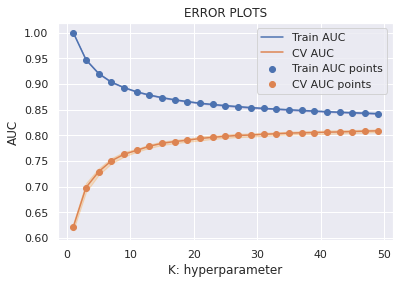

Best cross-validation score: 0.809
The best k from gridsearch : 49


In [ ]:
best_k=Grid_search(X_train,Y_train,'brute')

## Testing with Test Data

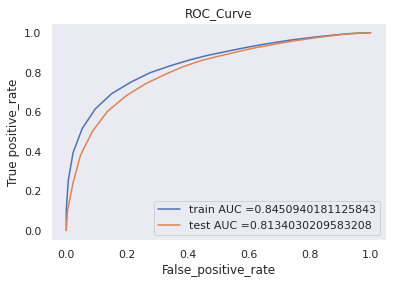

The AUC_score of test_data is : 0.8134030209583208


In [ ]:
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'brute')

              precision    recall  f1-score   support

           0       0.62      0.11      0.18      4390
           1       0.87      0.99      0.92     25610

    accuracy                           0.86     30000
   macro avg       0.74      0.55      0.55     30000
weighted avg       0.83      0.86      0.81     30000



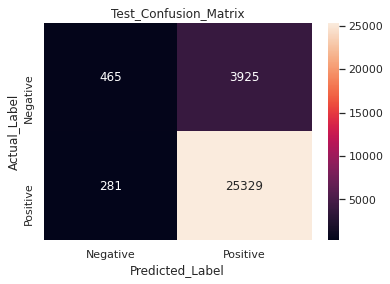

In [ ]:
metric(X_train_tf_idf,Y_train,X_test_tf_idf,Y_test,'brute')

## Applying KNN brute force on word2vec Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state = 5) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70000,) (70000,)
(30000,) (30000,)


In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
train_list_of_sentance=[]
for sentance in X_train:
    train_list_of_sentance.append(sentance.split())

In [ ]:
train_list_of_sentance[0]

['almost',
 'imposs',
 'find',
 'senseo',
 'decaffein',
 'coffe',
 'anywher',
 'know',
 'alway',
 'get',
 'amazon',
 'com',
 'alway',
 'receiv',
 'quick']

In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
train_w2v_model=Word2Vec(train_list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
train_w2v_words = list(train_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  10877
sample words  ['almost', 'imposs', 'find', 'senseo', 'decaffein', 'coffe', 'anywher', 'know', 'alway', 'get', 'amazon', 'com', 'receiv', 'quick', 'ran', 'friend', 'talk', 'blue', 'mountain', 'blend', 'desert', 'sound', 'differ', 'decid', 'tri', 'magnum', 'jamaican', 'better', 'suspect', 'rich', 'flavor', 'slight', 'acid', 'drank', 'morn', 'think', 'would', 'tasti', 'even', 'decent', 'use', 'cook', 'tast', 'great', 'prefer', 'wheat', 'pasta', 'love', 'not', 'releas']


In [ ]:
train=train_w2v_model[train_w2v_model.wv.vocab]
train.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(10877, 50)

In [ ]:
# Word2Vec
# compute word2vec for each review.
import tqdm as tqdm
Train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in (train_list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 50 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    Train_vectors.append(sent_vec)
Train_vectors = np.array(Train_vectors)
print(Train_vectors.shape)
print(Train_vectors[0])

(70000, 50)
[  7.02254247  -7.8314327    0.15746853  13.43920316   6.53562319
   5.56643712   2.50953024 -12.73702957   3.0779701   -1.01174133
   2.03003091   9.1436034  -17.47824612  -9.30124956   9.80021962
 -20.23550804   7.19713537  -7.0724033    3.61790082  -4.79025702
  -7.28695226   5.51285747  -1.41807103 -12.01984588 -14.51327189
   0.3588255   10.95217399  -8.21761194   1.69987483  -4.1629363
 -13.26472729  -9.27557077   7.221809    11.11093943   0.22100691
   3.73062924  18.27623537  14.91229562  -4.88593392  15.17609385
 -11.30366325 -14.17278171   1.69969444  -8.43378162  -1.62858734
  -3.19563121  -6.00352907  -1.99037913   1.09294048  22.1708349 ]


In [ ]:
# Train your own Word2Vec model using your own text corpus for test data
i=0
test_list_of_sentance=[]
for sentance in X_test:
    test_list_of_sentance.append(sentance.split())

In [ ]:
test_w2v_model=Word2Vec(test_list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
test_w2v_words = list(test_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  7479
sample words  ['bought', 'sampler', 'store', 'year', 'amazon', 'great', 'bulk', 'price', 'not', 'wrong', 'varieti', 'got', 'stock', 'stuffer', 'like', 'old', 'day', 'candi', 'cigarett', 'think', 'someth', 'chang', 'recip', 'use', 'thicker', 'substanc', 'thin', 'realli', 'look', 'unsalt', 'know', 'better', 'also', 'salt', 'would', 'probabl', 'tast', 'wow', 'amaz', 'without', 'boyfriend', 'eat', 'whole', 'bag', 'bring', 'mom', 'aunt', 'friend', 'stuff', 'tasti']


In [ ]:
test=test_w2v_model[test_w2v_model.wv.vocab]
test.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(7479, 50)

In [ ]:
# Word2Vec for each review
# compute word2vec for each review.
Test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 50 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    Test_vectors.append(sent_vec)
Test_vectors = np.array(Test_vectors)
print(Test_vectors.shape)
print(Test_vectors[0])

(30000, 50)
[  8.25252733 -11.82189095  -3.57863913  12.87409285  16.77103677
  -1.42698365  -1.0883747   -1.68540867  13.91896036  -6.54745761
   6.53650946   5.2717807  -10.91093633   4.69420458   2.64317086
   2.30922206  12.27576375 -10.02304132  -1.55012984  -1.12938459
   1.46845564   3.42895466 -10.29822849  -2.27216779  -1.08992173
   6.52361646   2.59965959  11.67876034  -0.35636495 -10.0371397
  -3.55513244  -4.61214952  -3.08466935  11.06952623  -8.71551296
   3.06268389   6.77085503  -7.64271356   6.63541722  -6.17617214
  -7.52968171   1.2163448   -2.80240148  -0.68646778   1.95628269
 -10.81424957  -1.82074101   2.35415032  -5.88948757   4.30198722]


In [ ]:
X_train=Train_vectors
X_test=Test_vectors
print(X_train.shape)
print(X_test.shape)

(70000, 50)
(30000, 50)


## Hyperparameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 330.5min finished


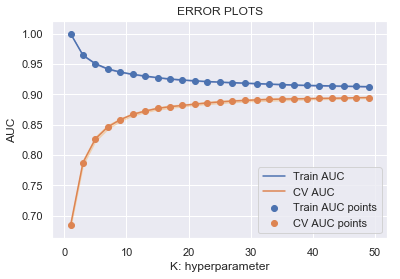

Best cross-validation score: 0.895
The best k from gridsearch : 49


In [ ]:
best_k=Grid_search(X_train,Y_train,'brute')

In [ ]:
import gc
gc.collect()

6101

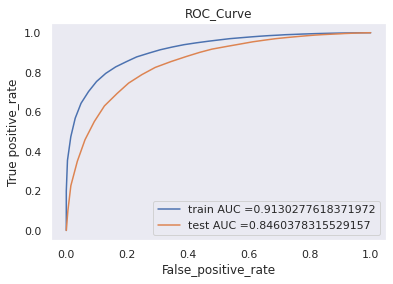

The AUC_score of test_data is : 0.8460378315529157


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'brute')

              precision    recall  f1-score   support

           0       0.75      0.14      0.23      4469
           1       0.87      0.99      0.93     25531

    accuracy                           0.86     30000
   macro avg       0.81      0.57      0.58     30000
weighted avg       0.85      0.86      0.82     30000



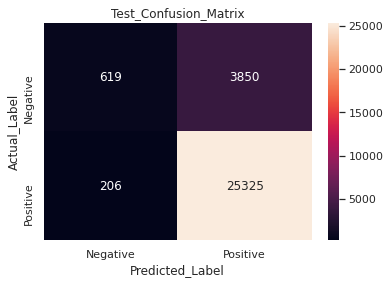

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'brute')

# Applying KNN brute force on AVG W2V Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70000,) (70000,)
(30000,) (30000,)


In [ ]:
print(train_list_of_sentance[0])
print(test_list_of_sentance[0])

['coffe', 'great', 'senseo', 'year', 'unabl', 'find', 'pod', 'local', 'anymor', 'subscrib', 'save', 'amazon', 'love', 'foam', 'top', 'coffe', 'not', 'even', 'want', 'regular', 'coffe', 'anymor', 'sinc', 'found', 'senseo', 'year', 'ago']
['eat', 'one', 'lunch', 'everi', 'day', 'better', 'job', 'satisfi', 'appetit', 'lean', 'cuisin', 'similar', 'product', 'tast', 'great', 'compar', 'higher', 'calori', 'protein', 'bar']


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(70000, 50)
[ 1.89010195e-01  1.26079250e-01 -1.08042295e+00  3.92646206e-01
 -4.42445471e-02 -2.42420401e-01 -1.36822465e-01  1.42251452e-01
  1.53229759e-01 -6.88391903e-01 -1.08399620e+00 -3.38373393e-01
  1.06132985e+00  2.37566576e-01  1.18830483e-03  4.05523328e-01
 -1.28615314e+00  1.07423699e+00  5.04843072e-01  6.59703275e-01
 -1.27669382e+00  4.10082303e-01 -5.73367714e-01  1.18395182e+00
  7.47184254e-01 -4.23921934e-01 -1.21458590e+00  1.96896971e-01
 -6.52501884e-01  1.57125283e-02  3.15201257e-03  4.55411946e-02
 -1.06755058e-01  2.52028233e-01  8.41750208e-01 -8.24867753e-01
 -3.34183170e-01 -8.41707639e-01 -6.84900077e-01 -7.47399731e-01
 -5.24041483e-01 -6.87320083e-01  3.59944189e-01 -2.51928075e-01
 -4.41813495e-01  8.35981490e-02 -1.54399206e-01 -1.02199749e+00
  5.46314503e-01 -3.09733664e-01]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(30000, 50)
[-0.85299594  0.88140037 -0.32241364  0.36125166  0.73547214  0.58099233
  0.04964868  0.26519165 -0.01954799 -0.36714886 -0.80316811 -0.58810775
 -0.2917361   0.46344997 -0.14233653  0.88373861 -0.36744088  0.04195481
  0.43944933 -0.32382276 -0.0152091  -0.66246308 -0.59617004  0.70747839
  0.17726794  0.56677888  0.44645006 -0.39719154 -0.31535215  0.54607459
  0.31112551 -0.20760194 -0.16319462  0.49743579 -0.09175554 -0.4901644
  0.48214443 -1.04798857  0.07623004  0.65580063 -0.31154239  0.10171542
  0.12473965  0.03214992  0.3732073  -0.17899503 -0.47073024  0.23310506
  0.2586889  -0.35464693]


In [ ]:
X_train=train_vectors
X_test=test_vectors

## Hyperparameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 159.1min finished


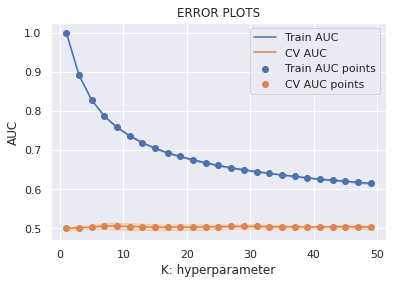

Best cross-validation score: 0.506
The best k from gridsearch : 7


In [ ]:
best_k=Grid_search(X_train,Y_train,'brute')

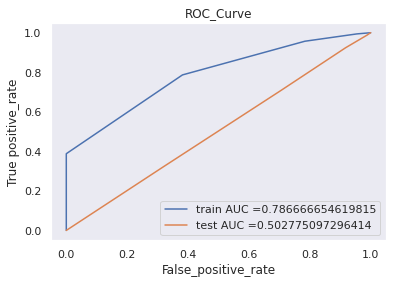

The AUC_score of test_data is : 0.502775097296414


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'brute')

              precision    recall  f1-score   support

           0       0.14      0.01      0.02      4370
           1       0.85      0.99      0.92     25630

    accuracy                           0.85     30000
   macro avg       0.50      0.50      0.47     30000
weighted avg       0.75      0.85      0.79     30000



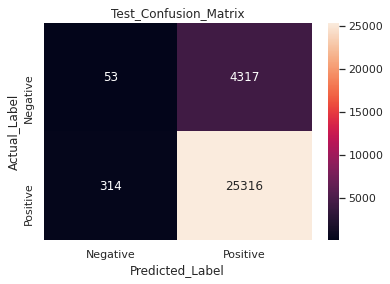

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'brute')

## Applying KNN brute force on TFIDF_W2V Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(70000,) (70000,)
(30000,) (30000,)


In [ ]:
print(train_list_of_sentance[0])
print(test_list_of_sentance[0])

['use', 'product', 'year', 'mother', 'open', 'heart', 'surgeri', 'product', 'list', 'altern', 'option', 'eat', 'use', 'place', 'butter', 'soup', 'sauc', 'bake', 'potato', 'veget', 'hard', 'find', 'amazon', 'com', 'make', 'easi', 'keep', 'stock']
['catnip', 'slow', 'grow', 'first', 'seed', 'sprout', 'littl', 'contain', 'two', 'week', 'one', 'month', 'transplant', 'bigger', 'pot', 'grow', 'like', 'crazi', 'happi', 'cat']


In [ ]:
#define tf_idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
train_tfidf_w2v = tfidf_vect.fit(X_train)
test_tfidf_w2v = tfidf_vect.transform(X_test)
print(train_tfidf_w2v.shape, test_tfidf_w2v.shape)

(70000, 35316) (30000, 35316)


In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
train_tfidf_w2v_vectors = []
row = 0
for sent in train_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of test data
tfidf_feat = tfidf_vect.get_feature_names()
test_tfidf_w2v_vectors = []
row = 0
for sent in test_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
X_train=np.array(train_tfidf_w2v_vectors)
X_test=np.array(test_tfidf_w2v_vectors)
print(X_train.shape)
print(X_test.shape)

(70000, 50)
(30000, 50)


## Hyperparameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 143.7min finished


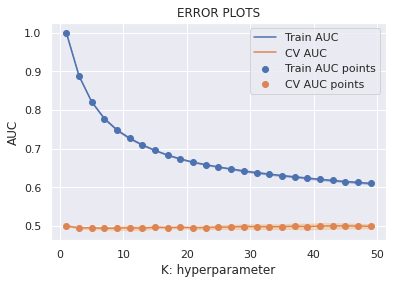

Best cross-validation score: 0.500
The best k from gridsearch : 45


In [ ]:
best_k=Grid_search(X_train,Y_train,'brute')

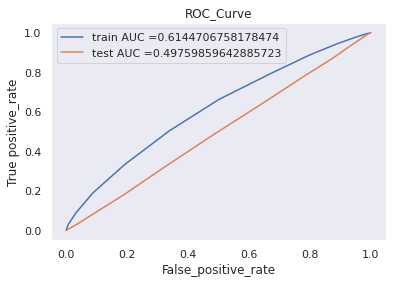

The AUC_score of test_data is : 0.49759859642885723


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'brute')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4491
           1       0.85      1.00      0.92     25509

    accuracy                           0.85     30000
   macro avg       0.43      0.50      0.46     30000
weighted avg       0.72      0.85      0.78     30000



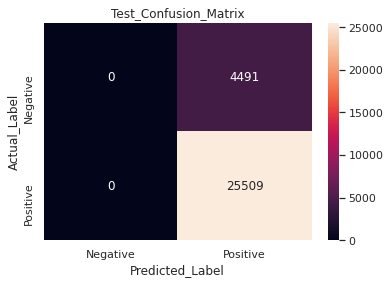

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'brute')

# Apply Knn kd tree on Bow Features

In [ ]:
#K-D tree takes lots of time so I used 10 K data points only
#use preprocessed_reviews and score for building a model 
X=data['preprocessed_reviews'][:10000].values
Y=data['Score'][:10000].values

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting
   
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7000,) (7000,)
(3000,) (3000,)


In [ ]:
#featurization_using_Bow
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(min_df=10, max_features=500)
vect.fit(X_train)
X_train_bow=vect.fit_transform(X_train)
X_test_bow=vect.transform(X_test)

#after vectorizations
print(X_train_bow.shape,Y_train.shape)
print(X_test_bow.shape,Y_test.shape)

(7000, 500) (7000,)
(3000, 500) (3000,)


In [ ]:
type(X_train_bow)

scipy.sparse.csr.csr_matrix

In [ ]:
#kd_tree accepts only dence points so convert in sparse matrices to dence matrices
X_train=X_train_bow.todense()
X_test=X_test_bow.todense()

In [ ]:
type(X_train)

numpy.matrix

# Hyper parameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 106.2min finished


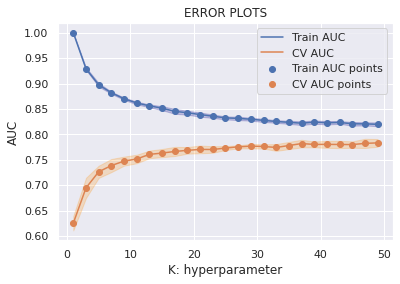

Best cross-validation score: 0.783
The best k from gridsearch : 49


In [ ]:
best_k=Grid_search(X_train,Y_train,'kd_tree')

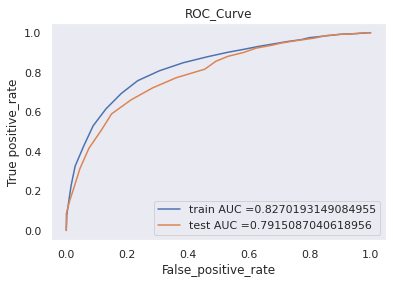

The AUC_score of test_data is : 0.7915087040618956


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'kd_tree')

              precision    recall  f1-score   support

           0       0.67      0.12      0.20       470
           1       0.86      0.99      0.92      2530

    accuracy                           0.85      3000
   macro avg       0.77      0.55      0.56      3000
weighted avg       0.83      0.85      0.81      3000



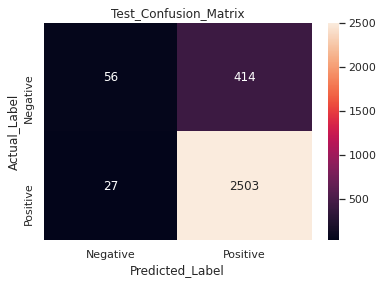

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'kd_tree')

# Apply Knn kd tree on TFIDF Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)   

(7000,) (7000,)
(3000,) (3000,)


In [ ]:
#generating the tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=10, max_features=500,ngram_range=(1, 2))
X_train_tf_idf=vect.fit_transform(X_train)
X_test_tf_idf=vect.transform(X_test)

#after vectorizations
print(X_train_tf_idf.shape,Y_train.shape)
print(X_test_tf_idf.shape,Y_test.shape)

(7000, 500) (7000,)
(3000, 500) (3000,)


In [ ]:
#kd_tree accepts only dence points so convert in sparse matrices to dence matrices
X_train=X_train_tf_idf.todense()
X_test=X_test_tf_idf.todense()

# Hyper parameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 104.9min finished


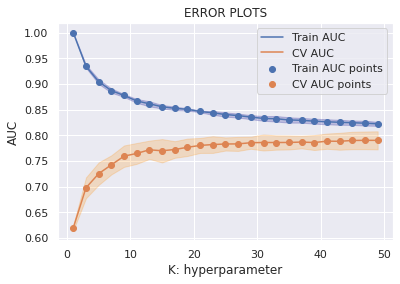

Best cross-validation score: 0.790
The best k from gridsearch : 47


In [ ]:
best_k=Grid_search(X_train,Y_train,'kd_tree')

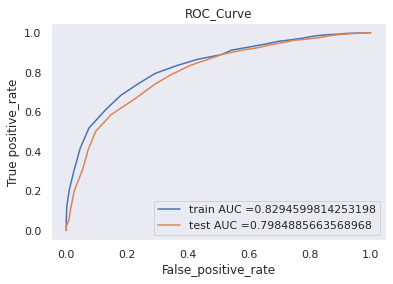

The AUC_score of test_data is : 0.7984885663568968


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'kd_tree')

              precision    recall  f1-score   support

           0       0.68      0.11      0.19       488
           1       0.85      0.99      0.92      2512

    accuracy                           0.85      3000
   macro avg       0.77      0.55      0.55      3000
weighted avg       0.82      0.85      0.80      3000



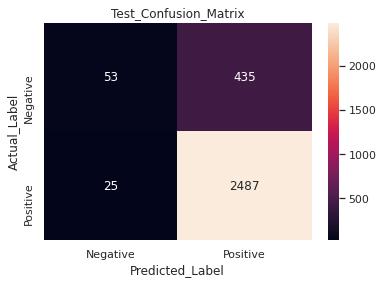

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'kd_tree')

## Applying KNN version of Kd-tree on word2vec Features

In [ ]:
#K-D tree takes lots of time so I used 10 K data points only
#use preprocessed_reviews and score for building a model 
X=data['preprocessed_reviews'][:10000].values
Y=data['Score'][:10000].values

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7000,) (7000,)
(3000,) (3000,)


In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
train_list_of_sentance=[]
for sentance in X_train:
    train_list_of_sentance.append(sentance.split())

In [ ]:
train_list_of_sentance[0]

['earl',
 'gray',
 'tea',
 'choic',
 'absolut',
 'favorit',
 'said',
 'state',
 'gourmet',
 'earl',
 'grey',
 'offer',
 'adagio',
 'best',
 'best',
 'aroma',
 'enough',
 'make',
 'swoon',
 'actual',
 'pretti',
 'good',
 'swoon',
 'mani',
 'thing',
 'tea',
 'caus',
 'condit',
 'would',
 'made',
 'great',
 'victorian',
 'ladi',
 'well',
 'ladi',
 'may',
 'bit',
 'stretch',
 'least',
 'victorian',
 'would',
 'appropri',
 'anyway',
 'loos',
 'leaf',
 'alway',
 'way',
 'time',
 'inclin',
 'like',
 'mine',
 'rather',
 'strong',
 'side',
 'must',
 'admit',
 'enjoy',
 'smell',
 'steep',
 'almost',
 'much',
 'enjoy',
 'drink',
 'oil',
 'bergamot',
 'not',
 'overwhelm',
 'far',
 'superior',
 'stuff',
 'add',
 'tea',
 'day',
 'not',
 'tast',
 'aroma',
 'not',
 'linger',
 'three',
 'day',
 'afterward',
 'recommend',
 'high',
 'price',
 'consid',
 'tax',
 'situat',
 'mile',
 'drive',
 'take',
 'get',
 'sourc',
 'quit',
 'competit']

In [ ]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# min_count = 5 considers only words that occured atleast 5 times
train_w2v_model=Word2Vec(train_list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
train_w2v_words = list(train_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(train_w2v_words))
print("sample words ", train_w2v_words[0:50])

number of words that occured minimum 5 times  4231
sample words  ['earl', 'gray', 'tea', 'choic', 'absolut', 'favorit', 'said', 'state', 'gourmet', 'grey', 'offer', 'adagio', 'best', 'aroma', 'enough', 'make', 'actual', 'pretti', 'good', 'mani', 'thing', 'caus', 'condit', 'would', 'made', 'great', 'ladi', 'well', 'may', 'bit', 'stretch', 'least', 'appropri', 'anyway', 'loos', 'leaf', 'alway', 'way', 'time', 'like', 'mine', 'rather', 'strong', 'side', 'must', 'admit', 'enjoy', 'smell', 'steep', 'almost']


In [ ]:
# Word2Vec
# compute word2vec for each review.
import tqdm as tqdm
Train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in (train_list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 50 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    Train_vectors.append(sent_vec)
Train_vectors = np.array(Train_vectors)
print(Train_vectors.shape)
print(Train_vectors[0])

(7000, 50)
[-44.14528491  35.8972289    7.31160794 -37.55544629  12.08806692
 -40.19721493 -54.65679952  24.20531007   9.49694053 -73.25059135
  17.04818443 -17.59954881 -23.16582259  -3.21277662  -9.70010027
 -49.80917064 -16.59125411  53.85747649  -5.75556424  67.68123959
  -4.23473511 -23.59149442  -3.72091673 -37.24332619  15.8038083
  26.35374519 -23.94465647  -0.68666211 -19.2617154   14.35522668
  21.00076101  38.93674244   9.76737596  -1.24428453  15.9210028
  27.74259126 -20.54467386  -9.22137494  15.59240084   3.55945579
 -41.60674016   2.58924636 -80.09451994   1.3989257   44.22247614
 -19.71944875   3.0169032   17.85016135 -23.81229214  45.71100122]


In [ ]:
# Train your own Word2Vec model using your own text corpus for test data
i=0
test_list_of_sentance=[]
for sentance in X_test:
    test_list_of_sentance.append(sentance.split())

In [ ]:
test_w2v_model=Word2Vec(test_list_of_sentance,min_count=5,size=50, workers=4)    

In [ ]:
test_w2v_words = list(test_w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(test_w2v_words))
print("sample words ", test_w2v_words[0:50])

number of words that occured minimum 5 times  2716
sample words  ['main', 'ingredi', 'miso', 'soup', 'keep', 'look', 'year', 'old', 'cat', 'happier', 'eat', 'stuff', 'rather', 'dri', 'iam', 'food', 'kidney', 'seem', 'better', 'despit', 'fail', 'condit', 'age', 'problem', 'order', 'supplier', 'amazon', 'com', 'got', 'would', 'direct', 'big', 'fan', 'love', 'smoke', 'flavor', 'chees', 'hit', 'howev', 'slight', 'consist', 'hard', 'explain', 'except', 'not', 'melt', 'like', 'normal', 'past', 'great']


In [ ]:
# Word2Vec for each review
# compute word2vec for each review.
Test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 50 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    Test_vectors.append(sent_vec)
Test_vectors = np.array(Test_vectors)
print(Test_vectors.shape)
print(Test_vectors[0])

(3000, 50)
[-2.86409116  0.39101008  2.21890123 -2.00633398  1.41306982 -4.01826519
 -4.52769704  1.08178985  2.20840555 -6.33172178  0.49824876 -2.28646664
 -1.04085533  1.21223023 -0.84279723 -2.66596377 -2.01326262  3.00453798
  0.03897804  6.00822437  0.64068643 -1.91754322  0.62813371 -1.2515483
  1.48656292  2.26965429 -0.53963476 -0.46904223 -0.77732422 -1.21016105
  1.9380397   1.04142193 -0.12872257  0.36736539  0.89697889  1.90255424
 -0.97661974 -2.71457753  0.00732596 -0.04018631 -1.7019173  -2.75977391
 -4.05668581  0.81446941  2.91333407 -0.54270822 -1.37493724 -0.44066847
 -1.2236992   3.26790723]


In [ ]:
X_train=Train_vectors
X_test=Test_vectors

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7000, 50)
(3000, 50)


# Hyper parameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.9min finished


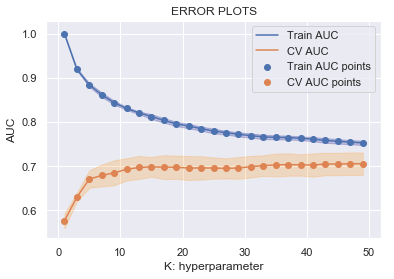

Best cross-validation score: 0.706
The best k from gridsearch : 47


In [ ]:
best_k=Grid_search(X_train,Y_train,'kd_tree')

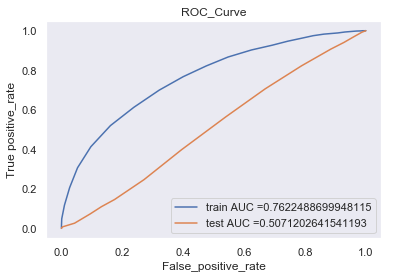

The AUC_score of test_data is : 0.5071202641541193


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'kd_tree')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       487
           1       0.84      1.00      0.91      2513

   micro avg       0.84      0.84      0.84      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.70      0.84      0.76      3000



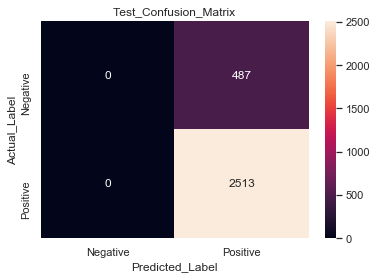

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'kd_tree')

## Applying KNN version of Kd-tree on Avg_word2vec Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7000,) (7000,)
(3000,) (3000,)


In [ ]:
print(train_list_of_sentance[0])
print(test_list_of_sentance[0])

['earl', 'gray', 'tea', 'choic', 'absolut', 'favorit', 'said', 'state', 'gourmet', 'earl', 'grey', 'offer', 'adagio', 'best', 'best', 'aroma', 'enough', 'make', 'swoon', 'actual', 'pretti', 'good', 'swoon', 'mani', 'thing', 'tea', 'caus', 'condit', 'would', 'made', 'great', 'victorian', 'ladi', 'well', 'ladi', 'may', 'bit', 'stretch', 'least', 'victorian', 'would', 'appropri', 'anyway', 'loos', 'leaf', 'alway', 'way', 'time', 'inclin', 'like', 'mine', 'rather', 'strong', 'side', 'must', 'admit', 'enjoy', 'smell', 'steep', 'almost', 'much', 'enjoy', 'drink', 'oil', 'bergamot', 'not', 'overwhelm', 'far', 'superior', 'stuff', 'add', 'tea', 'day', 'not', 'tast', 'aroma', 'not', 'linger', 'three', 'day', 'afterward', 'recommend', 'high', 'price', 'consid', 'tax', 'situat', 'mile', 'drive', 'take', 'get', 'sourc', 'quit', 'competit']
['main', 'ingredi', 'monosodium', 'glutam', 'miso', 'soup', 'keep', 'look']


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_w2v_words:
            vec = train_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
train_vectors = np.array(train_vectors)
print(train_vectors.shape)
print(train_vectors[0])

(7000, 50)
[-0.50165096  0.40792306  0.08308645 -0.42676644  0.1373644  -0.45678653
 -0.62109999  0.27506034  0.10791978 -0.83239308  0.19372937 -0.19999487
 -0.26324798 -0.03650883 -0.11022841 -0.5660133  -0.18853698  0.61201678
 -0.06540414  0.769105   -0.04812199 -0.26808516 -0.04228314 -0.42321962
  0.17958873  0.29947438 -0.27209837 -0.00780298 -0.21888313  0.16312758
  0.23864501  0.44246298  0.11099291 -0.0141396   0.18092049  0.31525672
 -0.2334622  -0.10478835  0.17718637  0.04044836 -0.47280387  0.02942325
 -0.910165    0.01589688  0.50252814 -0.22408464  0.03428299  0.20284274
 -0.27059423  0.5194432 ]


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in test_list_of_sentance: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_w2v_words:
            vec = test_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)
test_vectors = np.array(test_vectors)
print(test_vectors.shape)
print(test_vectors[0])

(3000, 50)
[-0.47734853  0.06516835  0.36981687 -0.334389    0.23551164 -0.66971086
 -0.75461617  0.18029831  0.36806759 -1.05528696  0.08304146 -0.38107777
 -0.17347589  0.20203837 -0.14046621 -0.44432729 -0.33554377  0.50075633
  0.00649634  1.00137073  0.10678107 -0.31959054  0.10468895 -0.20859138
  0.24776049  0.37827571 -0.08993913 -0.0781737  -0.12955404 -0.20169351
  0.32300662  0.17357032 -0.02145376  0.06122756  0.14949648  0.31709237
 -0.16276996 -0.45242959  0.00122099 -0.00669772 -0.28365288 -0.45996232
 -0.6761143   0.1357449   0.48555568 -0.09045137 -0.22915621 -0.07344474
 -0.20394987  0.54465121]


In [ ]:
X_train=train_vectors
X_test=test_vectors

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7000, 50)
(3000, 50)


# Hyper parameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  6.3min finished


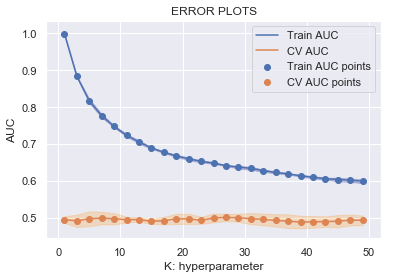

Best cross-validation score: 0.500
The best k from gridsearch : 27


In [ ]:
best_k=Grid_search(X_train,Y_train,'kd_tree')

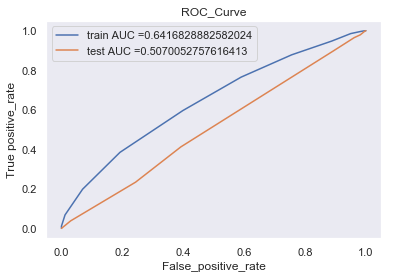

The AUC_score of test_data is : 0.5070052757616413


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'kd_tree')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       497
           1       0.83      1.00      0.91      2503

   micro avg       0.83      0.83      0.83      3000
   macro avg       0.42      0.50      0.45      3000
weighted avg       0.70      0.83      0.76      3000



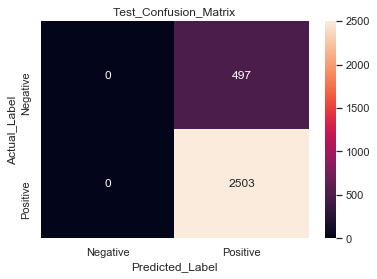

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'kd_tree')

## Applying KNN version of Kd-tree on TFIDF_word2vec Features

In [ ]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5) #random splitting

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)   

(7000,) (7000,)
(3000,) (3000,)


In [ ]:
print(train_list_of_sentance[0])
print(test_list_of_sentance[0])

['earl', 'gray', 'tea', 'choic', 'absolut', 'favorit', 'said', 'state', 'gourmet', 'earl', 'grey', 'offer', 'adagio', 'best', 'best', 'aroma', 'enough', 'make', 'swoon', 'actual', 'pretti', 'good', 'swoon', 'mani', 'thing', 'tea', 'caus', 'condit', 'would', 'made', 'great', 'victorian', 'ladi', 'well', 'ladi', 'may', 'bit', 'stretch', 'least', 'victorian', 'would', 'appropri', 'anyway', 'loos', 'leaf', 'alway', 'way', 'time', 'inclin', 'like', 'mine', 'rather', 'strong', 'side', 'must', 'admit', 'enjoy', 'smell', 'steep', 'almost', 'much', 'enjoy', 'drink', 'oil', 'bergamot', 'not', 'overwhelm', 'far', 'superior', 'stuff', 'add', 'tea', 'day', 'not', 'tast', 'aroma', 'not', 'linger', 'three', 'day', 'afterward', 'recommend', 'high', 'price', 'consid', 'tax', 'situat', 'mile', 'drive', 'take', 'get', 'sourc', 'quit', 'competit']
['main', 'ingredi', 'monosodium', 'glutam', 'miso', 'soup', 'keep', 'look']


In [ ]:
#define tf_idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=10,max_features=500)
train_tfidf_w2v = tfidf_vect.fit_transform(X_train)

In [ ]:
dictionary = dict(zip(tfidf_vect.get_feature_names(), list(tfidf_vect.idf_)))

In [ ]:
# tf_idf_w2v words of train data
tfidf_feat = tfidf_vect.get_feature_names()
train_tfidf_w2v_vectors = []
row = 0
for sent in train_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in train_w2v_words and word in tfidf_feat:
            vec = train_w2v_model.wv[word]
             #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    train_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
# tf_idf_w2v words of test data
tfidf_feat = tfidf_vect.get_feature_names()
test_tfidf_w2v_vectors = []
row = 0
for sent in test_list_of_sentance:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        if word in test_w2v_words and word in tfidf_feat:
            vec = test_w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    test_tfidf_w2v_vectors.append(sent_vec)
    row += 1

In [ ]:
X_train=np.array(train_tfidf_w2v_vectors)
X_test=np.array(test_tfidf_w2v_vectors)
print(X_train.shape)
print(X_test.shape)

(7000, 50)
(3000, 50)


# Hyper parameter tuning

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.3min finished


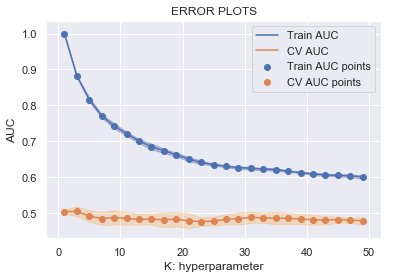

Best cross-validation score: 0.505
The best k from gridsearch : 3


In [ ]:
best_k=Grid_search(X_train,Y_train,'kd_tree')

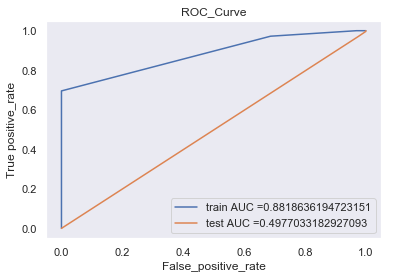

The AUC_score of test_data is : 0.4977033182927093


In [ ]:
# Testing with Test data
#computing the AUC on the test data
test_data(X_train,Y_train,X_test,Y_test,'kd_tree')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       455
           1       0.85      1.00      0.92      2545

   micro avg       0.85      0.85      0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000



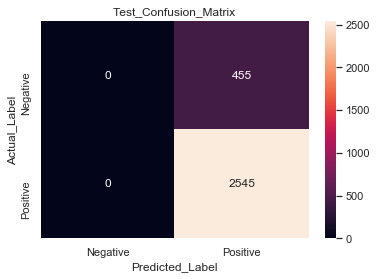

In [ ]:
#performance metric
metric(X_train,Y_train,X_test,Y_test,'kd_tree')

# Conclusions

In [ ]:
from prettytable import PrettyTable
    
table = PrettyTable()
table.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
table.add_row(["Bow", 'Brute_Forse', 49,80.18 ])
table.add_row(["TFIDF", 'Brute_Forse', 49, 81.34])
table.add_row(["Word2vec", 'Brute_Forse',49 ,84.61 ])
table.add_row(["Avg_Word2vec", 'Brute_Forse', 7, 50.27,])
table.add_row(["TFIDF_Word2vec", 'Brute_Forse',45 ,49.75 ])
table.add_row(["Bow", 'kd_Tree', 49,79.15 ])
table.add_row(["TFIDF", 'kd_Tree', 47,79.84 ])
table.add_row(["Word2vec", 'kd_Tree', 47,50.71 ])
table.add_row(["Avg_Word2vec", 'kd_Tree',27 ,50.12 ])
table.add_row(["TFIDF_Word2vec", 'kd_Tree', 3,49.76 ])
print(table)

+----------------+-------------+-----------------+-------+
|   Vectorizer   |    Model    | Hyper Parameter |  AUC  |
+----------------+-------------+-----------------+-------+
|      Bow       | Brute_Forse |        49       | 80.18 |
|     TFIDF      | Brute_Forse |        49       | 81.34 |
|    Word2vec    | Brute_Forse |        49       | 84.61 |
|  Avg_Word2vec  | Brute_Forse |        7        | 50.27 |
| TFIDF_Word2vec | Brute_Forse |        45       | 49.75 |
|      Bow       |   kd_Tree   |        49       | 79.15 |
|     TFIDF      |   kd_Tree   |        47       | 79.84 |
|    Word2vec    |   kd_Tree   |        47       | 50.71 |
|  Avg_Word2vec  |   kd_Tree   |        27       | 50.12 |
| TFIDF_Word2vec |   kd_Tree   |        3        | 49.76 |
+----------------+-------------+-----------------+-------+


# Observations

1. From the above table we observed that Word2vec having the highest AUC score on test data
2. TF-IDF model also works reasonabally good on test data .